# Proyecto Final de Estadística

Autor: Leonardo Bravo

# Load libraries

In [99]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Load data

In [2]:
# import data

path = "../../../../thesis/work/plasticc_dataset/"

# Train data
# train = pd.read_csv(path + "training_set.csv")
# train = pd.read_csv(path + "plasticc_train_lightcurves.csv")
# # print("Training data set")
# # display(train.head())

# metadata
# metadata_train = pd.read_csv(path + "training_set_metadata.csv")
# metadata_train = pd.read_csv(path + "plasticc_train_metadata.csv")
# # print("Metadata for training dataset")
# # display(metadata_train.head())

# # Test data
test1 = pd.read_csv(path + "plasticc_test_set_batch1.csv")
# test2 = pd.read_csv(path + "plasticc_test_set_batch2.csv")
# print("Test data set: ", test.shape)
# display(test.head())

# test metadata
metadata_test = pd.read_csv(path + "plasticc_test_metadata.csv")
# # print("Metadata for test dataset: ", metadata_test.shape)
# # display(metadata_test.head())

# # merge data
# merged_data_train = train.merge(metadata_train, on = "object_id")
merged_data_test1 = test1.merge(metadata_test, on = "object_id")
# merged_data_test2 = test2.merge(metadata_test, on = "object_id")
# merged_data = merged_data_train.merge(merged_data_test, on = "object_id")
# data = pd.concat([merged_data_train, merged_data_test])
# print("train merged data")
# display(merged_data_train.head())

# print("test merged data")
# display(merged_data_test.head())

# print("test merged data")
# display(merged_data_test.head())
# # # display(merged_data_test.head())
# # merged_data_test["object_id"].hist()
# # merged_data_train["object_id"].hist()
# # display(merged_data.head())

# # print("train data: ", merged_data_train.shape)
# print("test data: ", merged_data_test.shape)

In [3]:
# data = pd.concat([merged_data_train, merged_data_test])
print("Shape of data to work: ", merged_data_test1.shape)
# print(merged_data_train.shape)
# print(merged_data_test2.shape)
print("Unique targets: ", merged_data_test1.true_target.unique().shape[0])
print("targets: ", merged_data_test1.true_target.unique())

Shape of data to work:  (10855958, 31)
Unique targets:  18
targets:  [ 42  90  16  67  62 993  92  52  88  65 991 992  15  95   6  53 994  64]


In [4]:
# amount = merged_data_test1_filter.groupby("true_target").count()
amount = merged_data_test1.groupby("true_target").count()
display(amount.sort_values(by=['object_id'], ascending = False))
# display(amount)
# amount.index

# choose for remove classes
removing_classes = False
if removing_classes:
    
    classes_to_remove = [42, 90, 62]
    amount = amount.drop(classes_to_remove)
    
else:
    
    # > 1MM
#     classes_to_analyze = [42, 90]
    # < 1MM and > 100K
    classes_to_analyze = [62, 52, 88, 67]
#     # < 100k and > 10k
#     classes_to_analyze = [993, 92, 95, 15, 65, 992]
    # < 10k and > 0
#     classes_to_analyze = [991, 994, 53, 6, 16, 64]
#     993 until last one
#     classes_to_analyze = [x for x in merged_data_test1["true_target"].unique() if x not in [42, 90, 62, 52, 88, 67]]
    amount = amount.loc[classes_to_analyze, :]
    

display(amount)

,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
true_target,,,,,,,,,,,,,,,,,,,,,
42,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,...,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846,5288846
90,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,...,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048,4152048
62,722642,722642,722642,722642,722642,722642,722642,722642,722642,722642,...,722642,722642,722642,722642,722642,722642,722642,722642,722642,722642
52,267001,267001,267001,267001,267001,267001,267001,267001,267001,267001,...,267001,267001,267001,267001,267001,267001,267001,267001,267001,267001
88,118433,118433,118433,118433,118433,118433,118433,118433,118433,118433,...,118433,118433,118433,118433,118433,118433,118433,118433,118433,118433
67,118042,118042,118042,118042,118042,118042,118042,118042,118042,118042,...,118042,118042,118042,118042,118042,118042,118042,118042,118042,118042
993,47089,47089,47089,47089,47089,47089,47089,47089,47089,47089,...,47089,47089,47089,47089,47089,47089,47089,47089,47089,47089
92,45886,45886,45886,45886,45886,45886,45886,45886,45886,45886,...,45886,45886,45886,45886,45886,45886,45886,45886,45886,45886
95,32081,32081,32081,32081,32081,32081,32081,32081,32081,32081,...,32081,32081,32081,32081,32081,32081,32081,32081,32081,32081


,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
true_target,,,,,,,,,,,,,,,,,,,,,
62,722642,722642,722642,722642,722642,722642,722642,722642,722642,722642,...,722642,722642,722642,722642,722642,722642,722642,722642,722642,722642
52,267001,267001,267001,267001,267001,267001,267001,267001,267001,267001,...,267001,267001,267001,267001,267001,267001,267001,267001,267001,267001
88,118433,118433,118433,118433,118433,118433,118433,118433,118433,118433,...,118433,118433,118433,118433,118433,118433,118433,118433,118433,118433
67,118042,118042,118042,118042,118042,118042,118042,118042,118042,118042,...,118042,118042,118042,118042,118042,118042,118042,118042,118042,118042


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

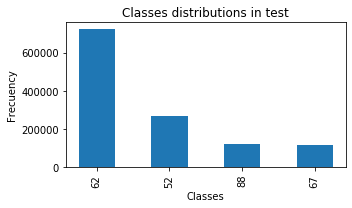

In [5]:
# plotting classes
# fig, ax = plt.subplots(1, 2, figsize = (10, 3), tight_layout = True)
fig, ax = plt.subplots(figsize = (5, 3), tight_layout = True)
# ax = fig.add_axes([0,0,1,1])
# plt.bar(objects_per_target.index, objects_per_target)
# ax[0].hist(merged_data_train.loc[:, "target"], density = True)
# ax[0].set_xlabel("Classes")
# ax[0].set_ylabel("Frecuency")
# ax[0].set_title("Classes distributions in train")

# # ax[1].hist(merged_data_test1.true_target, bins = 18)
# ax[1].bar([str(x) for x in  amount.index.tolist()], amount.object_id.values, width = 1)
# # ax[1].hist(merged_data_test1_filter.true_target, bins = 14)
# ax[1].set_xlabel("Classes")
# ax[1].set_ylabel("Frecuency")
# ax[1].set_title("Classes distributions in test")
# # ax[1].hist(merged_data_test.loc[:, "target"])
# plt.xticks(rotation=90)

# ax[1].hist(merged_data_test1.true_target, bins = 18)
ax.bar([str(x) for x in  amount.index.tolist()], amount.object_id.values, width = 0.5, align = "center")
# ax[1].hist(merged_data_test1_filter.true_target, bins = 14)
ax.set_xlabel("Classes")
ax.set_ylabel("Frecuency")
ax.set_title("Classes distributions in test")
# ax[1].hist(merged_data_test.loc[:, "target"])
plt.xticks(rotation=90)

# objects_per_target_train = merged_data_train.groupby("target", )["object_id"].count()
# display(objects_per_target)
# # fig, ax = plt.subplots(1, 2)
# # # ax = fig.add_axes([0,0,1,1])
# ax[0].bar(objects_per_target.index, objects_per_target)
# # ax[0].hist(merged_data_train["object_id"])

# Change name of dataset for simplicity

In [6]:
# light_curves = merged_data_train
# light_curves = merged_data_test1_filter
light_curves = merged_data_test1
# light_curves = merged_data_train[(merged_data_train["object_id"] == 615)]

print("data shape: ", light_curves.shape)
# print("data columns: ", light_curves.columns)
print("original objects ids: ", light_curves.object_id.unique().shape)
print("original classes: ", light_curves.true_target.unique().shape)

# getting only useful features
light_curves_ = light_curves[["object_id", "mjd", "passband", "flux", "flux_err", "true_target"]]
light_curves_ = light_curves_.rename(columns={"true_target": "target"})
# ligth_curves_.head()

light_curves = light_curves_
print("original classes: ", light_curves_.target.unique())

# Taking a subgroup of classes
if removing_classes:
    # get classes to analyze removing classes_to_remove
    light_curves = light_curves.loc[light_curves["target"].isin([x for x in light_curves["target"].unique() if x not in classes_to_remove])]
else:
    # for take only a part of classes and remove anothers ones
    light_curves = light_curves.loc[light_curves["target"].isin(classes_to_analyze)]
      
print("Final shape dataset to analyze: ", light_curves.shape)
print("Final classes: ", light_curves.target.unique().shape)
print("Total objects: ", light_curves.object_id.unique().shape)
print("final classes: ", light_curves.target.unique())

data shape:  (10855958, 31)
original objects ids:  (32926,)
original classes:  (18,)
original classes:  [ 42  90  16  67  62 993  92  52  88  65 991 992  15  95   6  53 994  64]
Final shape dataset to analyze:  (1226118, 6)
Final classes:  (4,)
Total objects:  (3726,)
final classes:  [67 62 52 88]


# Feature extraction

In [7]:
# get all object_ids
object_ids = light_curves["object_id"].unique()

print("There are " + str(object_ids.shape[0]) + " differentes objects, classified in "+ str(light_curves["target"].unique().shape[0]) + " differentes classes")
print(type(object_ids))

# overwrite objects ids (it's for analyze a piece of total objects's)
# objects_ids_to_analyze = object_ids.shape[0]
objects_ids_to_analyze = int(object_ids.shape[0])
# objects_ids_to_analyze = 1000
print("objects to analyze: ", objects_ids_to_analyze)
idx = np.random.randint(object_ids.shape[0], size=objects_ids_to_analyze)
object_ids = object_ids[idx]
# object_ids = object_ids[0:objects_ids_to_analyze]
# print(object_ids)

# set passband to analyze
passband = 0

features_names = ['Amplitude',
                  'AndersonDarling', 
                  'Autocor_length', 
                  'Beyond1Std', 
                  'CAR_mean',
                  'CAR_sigma', 
                  'CAR_tau', 
                  'Con', 
                  'Eta_e', 
                  'FluxPercentileRatioMid20',
                 'FluxPercentileRatioMid35', 
                  'FluxPercentileRatioMid50',
                 'FluxPercentileRatioMid65' ,
                  'FluxPercentileRatioMid80',
                 'Freq1_harmonics_amplitude_0' ,
                  'Freq1_harmonics_amplitude_1',
                 'Freq1_harmonics_amplitude_2' ,
                  'Freq1_harmonics_amplitude_3',
                 'Freq1_harmonics_rel_phase_0' ,
                  'Freq1_harmonics_rel_phase_1',
                 'Freq1_harmonics_rel_phase_2' ,
                  'Freq1_harmonics_rel_phase_3',
                 'Freq2_harmonics_amplitude_0' ,
                  'Freq2_harmonics_amplitude_1',
                 'Freq2_harmonics_amplitude_2' ,
                  'Freq2_harmonics_amplitude_3',
                 'Freq2_harmonics_rel_phase_0' ,
                  'Freq2_harmonics_rel_phase_1',
                 'Freq2_harmonics_rel_phase_2' ,
                  'Freq2_harmonics_rel_phase_3',
                 'Freq3_harmonics_amplitude_0' ,
                  'Freq3_harmonics_amplitude_1',
                 'Freq3_harmonics_amplitude_2' ,
                  'Freq3_harmonics_amplitude_3',
                 'Freq3_harmonics_rel_phase_0' ,
                  'Freq3_harmonics_rel_phase_1',
                 'Freq3_harmonics_rel_phase_2' ,
                  'Freq3_harmonics_rel_phase_3' ,
                  'Gskew',
                 'LinearTrend',
                  'MaxSlope', 
                  'Mean', 
                  'Meanvariance', 
                  'MedianAbsDev', 
                  'MedianBRP',
                 'PairSlopeTrend', 
                  'PercentAmplitude',
                  'PercentDifferenceFluxPercentile',
                 'PeriodLS',
                  'Period_fit',
                  'Psi_CS', 
                  'Psi_eta' ,
                  'Q31', 
                  'Rcs', 
                  'Skew',
                 'SlottedA_length',
                  'SmallKurtosis',
                  'Std',
                  'StetsonK' ,
                  'StetsonK_AC',
                 'StructureFunction_index_21',
                  'StructureFunction_index_31',
                 'StructureFunction_index_32'
                 ]

# # Getting one ligth curve for get ist features names
# mask1 = light_curves["object_id"] == 615
# mask2 = light_curves["passband"] == passband
# lc = light_curves[(mask1 & mask2)]

# # array with required data
# lc_data = [lc.mjd, lc.flux, lc.flux_err]

# # getting features
# fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
# # get features names
# features, values = fs.extract(*lc_data)
# features_names = features
# print(features_names)

There are 3726 differentes objects, classified in 4 differentes classes
<class 'numpy.ndarray'>
objects to analyze:  3726


In [152]:
from tqdm import tqdm_notebook
import feets.preprocess

# # select features
# # from 0:10 and remove AndersonDarling and FluxPercentileRatioMid20 it have an error: AttributeError: 'int' object has no attribute 'keys'
# features_names = features_names[0:5].tolist()
# features_names.remove("AndersonDarling")
# # features_names.remove("FluxPercentileRatioMid20")
# print((features_names))

print("features to get: ", features_names)

# array of features values
features_values = np.zeros((len(object_ids), len(features_names)))

# array of targets (classes)
targets = np.zeros(len(object_ids))

# iterate through each object id
for index, object_id in enumerate(tqdm_notebook(object_ids)):
    print("object id: ", object_id)
    
    # Getting each ligth curve
    mask1 = light_curves["object_id"] == object_id
    mask2 = light_curves["passband"] == passband
    lc = light_curves[(mask1 & mask2)]
    
    # array with required data
    lc_data = [lc.mjd, lc.flux, lc.flux_err]
    
#     # preprocessing
#     time, mag, error = feets.preprocess.remove_noise(time = lc.mjd, magnitude = lc.flux, error = lc.flux_err)
    
    # feature extraction
    fs = feets.FeatureSpace(only = features_names, data = ["time", "magnitude", "error"])
#     # get all features it can obteins with available data (parameter) 
#     fs = feets.FeatureSpace(data = ["time", "magnitude", "error"])
    features, values = fs.extract(*lc_data)
    
    # add features to features values arrays
    features_values[index, :] = values
    
    # get target of object
    targets[index] = lc.iloc[0, -1]
#     print(features.shape)
    
#     print(values)
#     print(index)

features to get:  ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmo

object id:  289877
object id:  156731


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  93049
object id:  161224
object id:  298226
object id:  81319


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  253649
object id:  107780
object id:  231522
object id:  4025


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  45395
object id:  168


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  329636


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=

object id:  330535
object id:  298226


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  331894
object id:  253649


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  72907
object id:  63782


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


object id:  161224


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  149344
object id:  230192


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=

object id:  112314
object id:  259823
object id:  107780


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  161224


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  268222
object id:  253649


/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  80421
object id:  63782
object id:  268222


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but the result is ~0.2
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of StetsonK must be 2/pi=0.798 for gausian distribution but th

object id:  112314



/home/leo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [154]:
# concatenate the feautres and targets of objects
features_values_with_targets = np.c_[ features_values, targets ]
# print(features_values_with_targets.shape)

# add target to name (for columns names)
columns = features_names + ["target"]
# print(columns)

# create new dataframe
features_light_curves = pd.DataFrame(data = features_values_with_targets,    # values
                                      index = object_ids,    # 1st column as index
                                      columns = columns
                                    )

# display new dataframe
display(features_light_curves.head())
print("features light curves shape: ",features_light_curves.shape )
print("Differens objects ids: "+ str(features_light_curves.shape[0]))
display(features_light_curves.describe())
display(features_light_curves["target"].unique().shape)
display(features_light_curves["target"].unique())

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
289877,4.251193,0.335211,1.0,0.269841,0.585959,-8.281094e-08,0.594536,0.000000,267.733301,0.123844,...,0.329153,1.0,1.201358,2.306238,0.782449,0.739155,1.215765,1.362518,1.310116,53.0
156731,3.706352,0.731221,1.0,0.269841,-0.251551,-1.901208e-07,0.595311,0.000000,288.381892,0.130051,...,-0.198162,1.0,1.590628,2.097453,0.795113,0.624572,1.693675,2.243351,1.380988,64.0
93049,10.418507,1.000000,2.0,0.111111,0.018823,1.228819e+00,61.420457,0.000000,55.935706,0.111455,...,2.990506,2.0,12.945516,5.066205,0.677410,0.506107,2.031135,3.004450,1.491350,991.0
161224,4.898978,0.999826,1.0,0.242857,2.392518,6.410737e+00,0.058253,0.000000,221.216813,0.098867,...,-0.967144,1.0,1.300523,2.324108,0.753172,0.539936,1.386365,1.636937,1.338028,53.0
298226,191.713804,1.000000,4.0,0.100000,0.845831,1.827619e+01,38.582110,0.044118,2.867647,0.005744,...,3.091790,7.0,9.458542,95.407549,0.486762,0.669550,2.175345,3.367653,1.612314,6.0


features light curves shape:  (32, 64)
Differens objects ids: 32


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
count,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,53.979672,0.770819,3.031250,0.247433,0.564178,3.708057e+00,116.691054,0.012107,241.492994,0.117066,...,0.673728,5.343750,2.578052,34.450267,0.755426,0.675653,1.616833,2.126689,1.379326,422.843750
std,101.913556,0.283671,3.685056,0.092175,1.000812,6.288511e+00,262.171096,0.021649,276.913073,0.089643,...,1.329075,10.225236,4.441818,69.720798,0.109130,0.086197,0.287706,0.624799,0.137964,478.607598
min,3.175612,0.200047,1.000000,0.069444,-0.671928,-5.528553e+00,0.054960,0.000000,0.397370,0.005744,...,-0.967144,1.000000,-1.393628,1.672100,0.469888,0.506107,1.215765,1.362518,1.150774,6.000000
25%,4.133655,0.455527,1.000000,0.194444,-0.016556,-6.625852e-08,0.593558,0.000000,18.926808,0.064187,...,-0.159553,1.000000,-0.147629,2.174142,0.721475,0.614195,1.386365,1.633926,1.307432,16.000000
50%,5.065458,0.999172,1.000000,0.266865,0.145023,1.058352e-01,0.595196,0.000000,218.729288,0.117549,...,0.256006,1.000000,1.026133,2.579903,0.794772,0.669550,1.583825,2.020104,1.339245,53.000000
75%,24.596898,1.000000,4.000000,0.328571,0.833202,6.410737e+00,61.765428,0.008929,271.444166,0.151092,...,1.327919,5.000000,3.408295,12.318682,0.814549,0.745270,1.765305,2.409763,1.478331,991.000000
max,327.254470,1.000000,13.000000,0.428571,3.788980,1.827619e+01,1214.093477,0.057143,1042.506724,0.489200,...,3.466777,51.000000,17.056273,231.753846,0.926022,0.835131,2.251127,3.569263,1.612314,994.000000


(6,)

array([ 53.,  64., 991.,   6., 994.,  16.])

In [155]:
# checking if it contains nan values
features_light_curves = features_light_curves.dropna()
print("Missing values: ", features_light_curves.isnull().sum().sum())

Missing values:  0


# Saving features light curves dataset in file

In [156]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

# store dataframe
features_light_curves.to_csv(index=False, path_or_buf = "/home/leo/Desktop/master_UACH/thesis/work/features_with_" + str(features_light_curves.shape[0]) + "_objects_and_" + str(features_light_curves.target.unique().shape[0]) + "_classes_and_" + str(len(features_names)) + "_features_" + timestr + ".csv")

In [137]:
# features distributions
if len(features_names) < 4:
    
    fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))
    for i, f in enumerate(range(0, 4)):
        
        #     print(i, f)
        ax[i].hist(features_light_curves.iloc[:, f])
        ax[i].set_title(features_names[f])
        
else:
    
    print("Not plotting because it has too much features!")

Not plotting because it has too much features!


# Load csv file of features

In [372]:
path = "../../../../thesis/work/"

# features with full data
features_light_curves = pd.read_csv(path + "features_with_test_10MM")
features_light_curves = features_light_curves.loc[:, ~features_light_curves.columns.str.contains('^Unnamed')]

# #features with 2 classes
# features_light_curves = pd.read_csv(path + "features_with_28624_objects_and_2_classes_and_63_features_20191213-135652.csv")

# #features with 4 classes
# features_light_curves = pd.read_csv(path + "features_with_3726_objects_and_4_classes_and_63_features_20191213-143431.csv")

# display data
display(features_light_curves.head())

# describe data
display(features_light_curves.describe())

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
0,16.615357,1.000000,2.0,0.066667,0.019998,1.484705,95.664554,0.000000,72.994932,0.030919,...,3.209414,2.0,12.147315,7.557994,0.490772,0.505396,1.274882,1.396377,1.116807,42.0
1,3.696149,0.192580,1.0,0.266667,-0.434003,0.662684,1.242349,0.000000,880.661127,0.155524,...,0.119594,1.0,0.166253,1.871742,0.799001,0.723708,1.390264,1.569584,1.204851,90.0
2,3.673180,0.970349,1.0,0.380952,-4.004859,5.339861,0.052501,0.000000,279.119649,0.186202,...,0.062554,1.0,-0.990093,2.191592,0.847869,0.683030,1.669679,2.296191,1.470335,42.0
3,11.679524,1.000000,4.0,0.114286,0.106827,1.522941,18.528582,0.029412,23.826204,0.056584,...,2.487879,7.0,6.684946,5.463795,0.590317,0.669835,1.610477,1.905472,1.256712,42.0
4,4.083864,0.144753,1.0,0.333333,0.032889,0.446037,19.495058,0.000000,806.667575,0.125562,...,-0.069841,1.0,0.215422,2.127095,0.773528,0.690846,1.513162,1.766029,1.255391,42.0


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
count,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000,3.273800e+04,3.273800e+04,32738.000000,32738.000000,32738.000000,...,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000,32738.000000
mean,9.156252,0.738717,1.285295,0.273023,0.667049,8.329773e+00,1.223624e+05,0.003588,334.399388,0.132281,...,0.337918,1.830778,1.716418,5.166375,0.779110,0.677003,1.554458,1.964858,1.358464,63.343729
std,62.627370,0.264997,0.974823,0.067113,123.387206,1.626290e+02,1.467674e+07,0.012232,337.089888,0.048940,...,0.938282,4.148894,4.014883,40.409116,0.071545,0.075168,0.240513,0.552231,0.144807,22.810249
min,1.936268,0.099994,1.000000,0.013889,-5605.022326,-8.888962e+00,-2.857559e-01,0.000000,0.362830,0.000594,...,-2.357760,1.000000,-1.758983,1.203757,0.267780,0.283972,0.374537,-0.606618,0.706697,6.000000
25%,3.790063,0.513987,1.000000,0.242857,-0.113944,-1.480182e-07,5.945364e-01,0.000000,178.874338,0.102244,...,-0.180945,1.000000,0.110105,1.960735,0.769549,0.632478,1.396292,1.598897,1.259485,42.000000
50%,4.232375,0.832145,1.000000,0.285714,0.040603,1.841622e-07,5.951962e-01,0.000000,221.530562,0.131374,...,0.123598,1.000000,0.688056,2.161031,0.796237,0.688233,1.531006,1.891422,1.351435,52.000000
75%,4.898007,0.990474,1.000000,0.317460,0.302074,1.024977e+00,6.331933e+00,0.000000,274.734195,0.162454,...,0.524362,1.000000,1.706398,2.457845,0.817217,0.730799,1.682974,2.258091,1.457252,90.000000
max,2136.942718,1.000000,15.000000,0.587302,6565.788243,6.873464e+03,2.396377e+09,0.107143,2206.971322,0.744764,...,8.117317,259.000000,71.844254,1357.190132,0.971144,0.911709,3.216762,5.696883,2.301273,95.000000


# Dimensionality reduction PCA

In [373]:
print("Full Dataframe (with labels)")
display(features_light_curves.head())

# print("Dataframe to input PCA")
# display(features_light_curves.iloc[:, 0: len(features_names)].head())

Full Dataframe (with labels)


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,target
0,16.615357,1.000000,2.0,0.066667,0.019998,1.484705,95.664554,0.000000,72.994932,0.030919,...,3.209414,2.0,12.147315,7.557994,0.490772,0.505396,1.274882,1.396377,1.116807,42.0
1,3.696149,0.192580,1.0,0.266667,-0.434003,0.662684,1.242349,0.000000,880.661127,0.155524,...,0.119594,1.0,0.166253,1.871742,0.799001,0.723708,1.390264,1.569584,1.204851,90.0
2,3.673180,0.970349,1.0,0.380952,-4.004859,5.339861,0.052501,0.000000,279.119649,0.186202,...,0.062554,1.0,-0.990093,2.191592,0.847869,0.683030,1.669679,2.296191,1.470335,42.0
3,11.679524,1.000000,4.0,0.114286,0.106827,1.522941,18.528582,0.029412,23.826204,0.056584,...,2.487879,7.0,6.684946,5.463795,0.590317,0.669835,1.610477,1.905472,1.256712,42.0
4,4.083864,0.144753,1.0,0.333333,0.032889,0.446037,19.495058,0.000000,806.667575,0.125562,...,-0.069841,1.0,0.215422,2.127095,0.773528,0.690846,1.513162,1.766029,1.255391,42.0


In [374]:
# Standarizing data
from sklearn.preprocessing import StandardScaler

# Standarize data
# this does not consider the last column (it's the target)
std_features_light_curves = StandardScaler().fit_transform(features_light_curves.iloc[:, 0: len(features_names)])

# print(std_features_light_curves.shape)
# print(len(features_names))
# plot standardized 
if len(features_light_curves.columns) < 3:
    
    fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))
    for i, f in enumerate(range(0, 4)):
    #     print(i, f)
        ax[i].hist(std_features_light_curves[:, f])
        ax[i].set_title(features_names[f])
        
else:
    
    print("Not ploting features because they are a lot !")

Not ploting features because they are a lot !


In [375]:
# PCA 
from sklearn.decomposition import PCA

n_latent_variables = features_light_curves.shape[1]-1
pca = PCA(n_components = n_latent_variables)

principalComponents = pca.fit_transform(std_features_light_curves)

# converting to DF
pca_df = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
                     )
# pca_df["object_id"] = object_ids
pca_df["target"] = features_light_curves["target"].values
pca_df.head()
# fig, ax = plt.subplots()
# ax.hist(features_light_curves.target)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,target
0,1.683694,-8.543344,-0.543626,1.501184,-4.986419,-0.137859,-0.392738,0.197818,0.427489,0.399668,...,0.042949,-0.031676,0.048496,-0.159756,-0.002877,0.001954,5.886441e-17,2.492582e-17,3.321503e-17,42.0
1,-0.614092,1.044890,0.487543,-0.918901,-1.748455,0.069217,-0.519940,0.439689,-0.199368,0.085733,...,0.008145,-0.028038,-0.019207,-0.022448,-0.002861,0.001078,1.026113e-16,2.330256e-16,3.929166e-16,90.0
2,-0.797255,3.477953,0.053279,-0.676852,2.569195,-0.608566,-1.338294,2.499420,-1.803837,-0.178940,...,-0.000843,0.001005,0.010003,-0.040549,-0.000296,0.004553,-1.663273e-16,-1.592947e-16,-1.865715e-16,42.0
3,1.559535,-7.695391,-0.595794,-1.328181,-1.227346,-0.900850,1.848996,0.916117,-1.406869,0.073551,...,-0.008786,0.047169,-0.018775,0.151741,-0.000628,0.003572,3.364013e-16,5.579077e-17,-3.978169e-16,42.0
4,-0.406689,0.989789,0.511640,-1.349813,-0.491252,-2.103691,1.393980,0.943715,0.897561,-0.027771,...,0.039536,0.008758,-0.005966,0.090970,0.000017,-0.001058,6.951075e-18,9.967261e-18,1.785860e-17,42.0


<IPython.core.display.Javascript object>


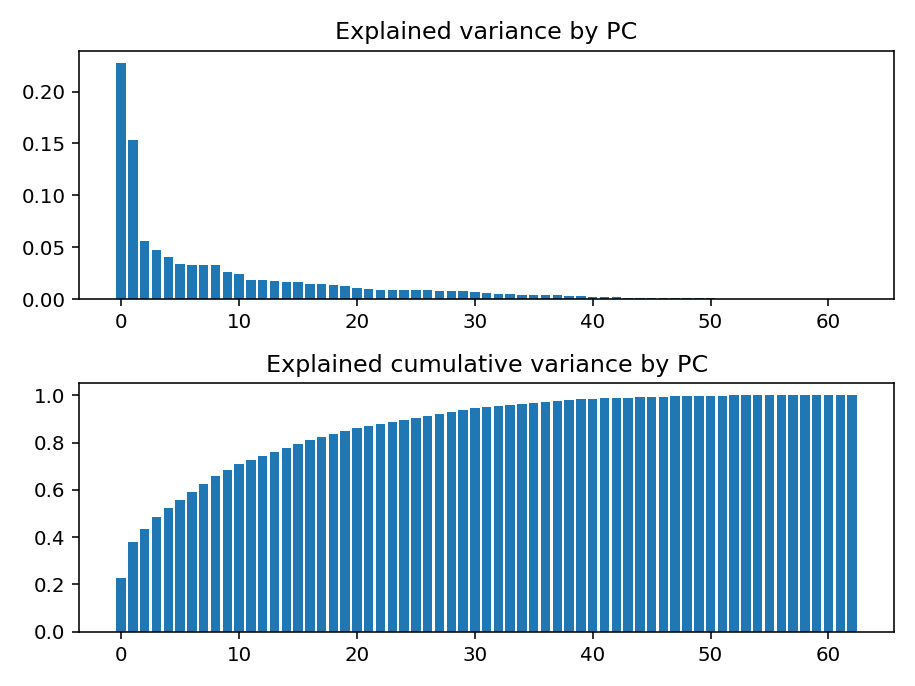

Explained variance with last LT:  1.0000000000000002


In [376]:
# plotting explained variance
fig, ax = plt.subplots(2, 1, tight_layout = True)
ax[0].bar(np.arange(n_latent_variables), pca.explained_variance_ratio_)
ax[0].set_title("Explained variance by PC")
ax[1].bar(np.arange(n_latent_variables), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_title("Explained cumulative variance by PC")
print("Explained variance with last LT: ", np.cumsum(pca.explained_variance_ratio_)[-1])

<IPython.core.display.Javascript object>


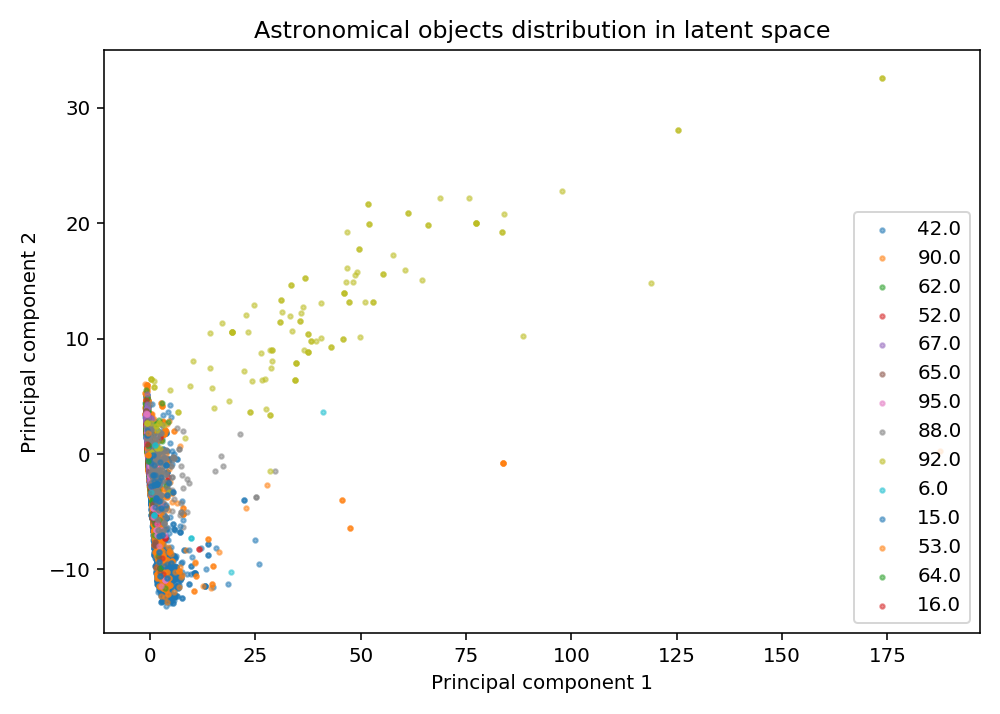

In [377]:
# plotting data projection with PCA
fig, ax  = plt.subplots(figsize = (7,5), tight_layout = True)
for label in pca_df.target.unique():
    
    ax.scatter(pca_df.loc[pca_df.target == label, 0], pca_df.loc[pca_df.target == label, 1], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
#     ax.scatter(pca_df.iloc[:, 4], pca_df.iloc[:, 5], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
    ax.set_xlabel("Principal component 1")
    ax.set_ylabel("Principal component 2")
    ax.set_title("Astronomical objects distribution in latent space")
plt.legend()
# for i, txt in enumerate(pca_df["label"]):
# #     print(txt)
#     ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i,1]))
    

# Dimensionality reduction with Autoencoder

## format data to train autoencoder

In [380]:
from torch.utils import data

# model = AutoEncoder(latent_dim = 1)

# Create dataset
print("Data shape: ", torch_data.shape)
torch_data = torch.from_numpy(std_features_light_curves).float()
torch_targets = torch.tensor(features_light_curves.iloc[:, -1].values).float()

dataset = data.TensorDataset(torch_data,torch_targets) # create your datset
# train_loader = data.DataLoader(dataset, batch_size=256) # create your dataloader

# Split train/test data
train_size = int(0.8 * std_features_light_curves.shape[0])
test_size = std_features_light_curves.shape[0] - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# train loader
train_loader = data.DataLoader(train_dataset, batch_size=256)
# test loader
test_loader = data.DataLoader(test_dataset)

Data shape:  torch.Size([3726, 63])


## Define autoencoder structure

In [381]:
import torch

# Building autoencoder
class Encoder(torch.nn.Module):
    
    def __init__(self, latent_dim, hidden_dim, input_dim = len(features_names)):

        super(Encoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(input_dim, hidden_dim)
#         self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.code = torch.nn.Linear(hidden_dim, latent_dim)
        self.activation = torch.nn.Softplus()

    def forward(self, x):
        
        output = self.activation(self.hidden_1(x))
#         output = self.activation(self.hidden_2(output))
        
        return (self.code(output))

class Decoder(torch.nn.Module):
    
    def __init__(self, latent_dim, hidden_dim, output_dim = len(features_names)):
        super(Decoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(latent_dim, hidden_dim)
#         self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.decode = torch.nn.Linear(hidden_dim, output_dim)
        self.activation = torch.nn.Softplus()
        
    def forward(self, z):
#         print("Decoder")
        output = self.activation(self.hidden_1(z))
#         output = self.activation(self.hidden_2(output))
        
        return (self.decode(output))
        
class AutoEncoder(torch.nn.Module):
    
    def __init__(self, latent_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(latent_dim, hidden_dim)
        self.decoder = Decoder(latent_dim, hidden_dim)
        
    def forward(self, x):
        
        return self.decoder(self.encoder(x))

In [384]:
# check number of parameters
latent_dim_ae = 63
hidden_dim = 30
model = AutoEncoder(latent_dim = latent_dim_ae, hidden_dim = hidden_dim)

# count amount of parameters
pp=0 
for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
        
print("AE parameters: ", pp)
print("Data shape: ", torch_data.shape[0])

AE parameters:  7746
Data shape:  32738


## Train autoencoder

<IPython.core.display.Javascript object>


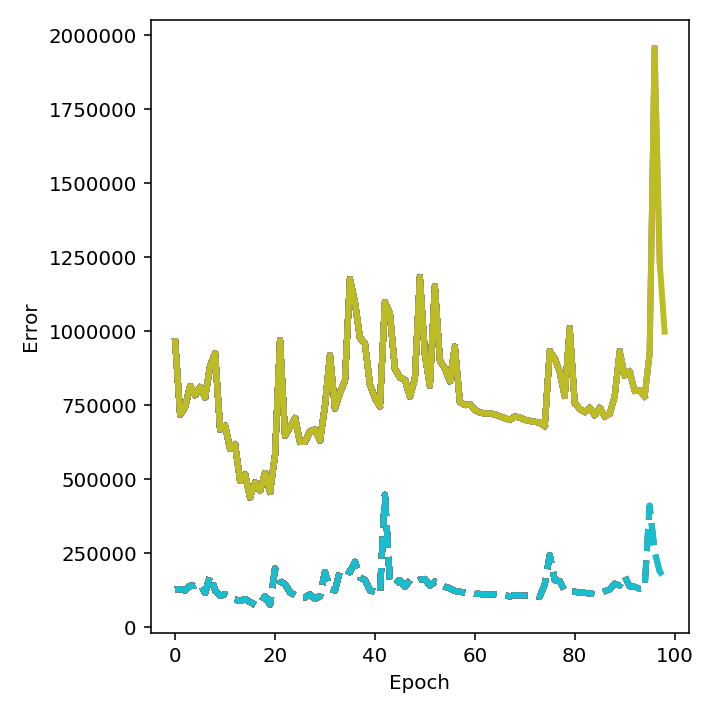

In [385]:
from tqdm import tqdm_notebook
import time

# model = AutoEncoder(latent_dim = n_latent_variables, hidden_dim = 5)
model = AutoEncoder(latent_dim = latent_dim_ae, hidden_dim = hidden_dim)

# model = AutoEncoder(latent_dim = 10, hidden_dim = 5)

# criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') # the target (reconstruction has to be between 0 and 1)
criterion = torch.nn.MSELoss(reduction = "sum")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

use_gpu = False

if use_gpu:
    model = model.cuda()
    
# fig, ax = plt.subplots()

# number of epochs
epochs = 100

# loss
train_loss = np.zeros((epochs,))
test_loss = np.zeros((epochs,))

# loss plot
fig, ax = plt.subplots(figsize = (5, 5), tight_layout = True)
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")

for nepoch in tqdm_notebook(range(epochs)):
    
#     print(nepoch)
    
    # train
    epoch_train_loss = 0
    for data, label in train_loader:
        
        optimizer.zero_grad()
        
        outputs = model.forward(data.type(torch.FloatTensor))
        
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
#     print("Train epoch {0} loss: {1}".format(nepoch, epoch_train_loss))
    train_loss[nepoch] = epoch_train_loss
    
    # test
    epoch_test_loss = 0
    
    for data, label in test_loader:
        
        outputs = model.forward(data.type(torch.FloatTensor))
        
        loss = criterion(outputs, data)
        
        epoch_test_loss += loss.item()
    
#     print("Test epoch {0} loss: {1}".format(nepoch, epoch_test_loss))
    test_loss[nepoch] = epoch_test_loss
    
    # plot loss
    ax.plot(train_loss[0: nepoch], label = "train", linewidth = 3) 
    ax.plot(test_loss[0: nepoch], label = "test", linestyle = "--", linewidth = 3) 
#     plt.show()
    fig.canvas.draw()
#     plt.legend()
#     time.sleep(1)
#     plt.show

## Latent representation

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,target
0,14.555206,-1.354698,-19.205711,-0.944155,11.128269,10.475911,-7.134066,6.723931,-19.607704,-11.894600,...,8.556789,7.762874,-11.740907,-7.044283,5.319016,-1.032592,8.783881,-4.821642,3.252361,42.0
1,2.690336,0.081005,0.724197,0.038987,2.326065,-0.706866,1.099689,0.979007,-2.314692,-0.205518,...,-1.143857,-0.353451,-1.349503,-0.408858,-0.679452,0.219597,-1.916217,-0.142107,0.438014,90.0
2,3.919859,-1.964488,0.438615,-1.956001,1.211262,-0.581826,2.454065,0.130696,-3.171052,-2.335033,...,-0.268142,1.237576,-2.374777,-0.728242,1.953691,-0.104793,-2.800569,-0.184349,0.298323,42.0
3,13.885322,-1.185738,-17.336880,-1.425537,11.343288,9.328749,-6.851420,7.049353,-19.458656,-12.970798,...,8.052215,8.101259,-11.863060,-5.810737,4.235855,0.179266,7.396785,-5.160149,3.562823,42.0
4,4.428441,-0.043681,-3.234632,-0.700265,4.163744,0.445738,-0.645682,1.730607,-4.916015,-2.801396,...,0.540966,0.497179,-3.774972,-1.639325,0.452842,-0.063920,0.492453,-1.129805,1.008752,42.0


<IPython.core.display.Javascript object>


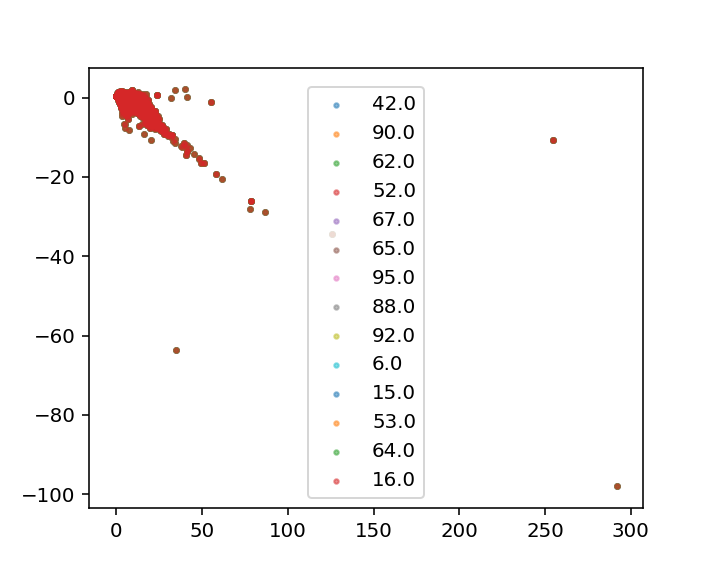

In [389]:
# get latent representation of data
latent_representation = model.encoder(torch_data.type(torch.FloatTensor)).detach().numpy()

# Creating new DF
autoencoder_df = pd.DataFrame(data = latent_representation
#              , columns = ['lv 1', 'lv 2'])
                             )

# autoencoder_df["object_id"] = object_ids
autoencoder_df["target"] = features_light_curves["target"].values
display(autoencoder_df.head())

# plotting latent representation
fig, ax  = plt.subplots(figsize = (5,4))
for label in autoencoder_df.target.unique():
    ax.scatter(autoencoder_df.iloc[:, 0], autoencoder_df.iloc[:, 1], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))    
plt.legend()
# for i, txt in enumerate(pca_df["label"]):
# #     print(txt)
#     ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i,1]))

# Supervised classification

In [390]:
# Split data in train and testing
from sklearn.model_selection import train_test_split

# split data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_df.iloc[:, 0:(pca_df.columns.shape[0] - 1)] , pca_df["target"], test_size=0.4, random_state=0)
X_ae_train, X_ae_test, y_ae_train, y_ae_test = train_test_split(autoencoder_df.iloc[:, 0:(autoencoder_df.columns.shape[0] - 1)] , autoencoder_df["target"], test_size=0.4, random_state=0)

print("train PCA: ", X_pca_train.shape)
print("test PCA: ", X_pca_test.shape)

print("train AU: ", X_ae_train.shape)
print("test AU: ", X_ae_test.shape)

train PCA:  (19642, 63)
test PCA:  (13096, 63)
train AU:  (19642, 63)
test AU:  (13096, 63)


In [391]:
# Train LR
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# score variable
scores_PCA = np.zeros((n_latent_variables,))
scores_AE = np.zeros((latent_dim_ae,))

print("PCA LR training")
# train LR with differentes number of PCs (PCA)
for i in tqdm_notebook(range(1, n_latent_variables + 1)):

    #     display(X_pca_train.iloc[:, 0:i].head())
    
    # training with PCA
    clf_pca = LogisticRegression(max_iter = 10000, multi_class = "auto", solver = "lbfgs", random_state=0).fit(X_pca_train.iloc[:, 0:i], y_pca_train)
    score_pca = clf_pca.score(X_pca_test.iloc[:, 0:i], y_pca_test)
#     print("Score with PCA: ", score)
    scores_PCA[i-1] = score_pca

print("AE LR training")
# train LR with differentes number of LV (AE)
for i in tqdm_notebook(range(1, latent_dim_ae + 1)):

    # trainig with AE
    clf_ae = LogisticRegression(max_iter = 10000, multi_class = "auto", solver = "lbfgs", random_state=0).fit(X_ae_train.iloc[:, 0:i], y_ae_train)
    score_ae = clf_ae.score(X_ae_test.iloc[:, 0:i], y_ae_test)
#     print("Score with PCA: ", score)
    scores_AE[i-1] = score_ae
    
# # plot scores
# fig, ax = plt.subplots()
# ax.scatter(range(1, n_latent_variables), scores_PCA)
# # scores_PCA

PCA LR training



AE LR training


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


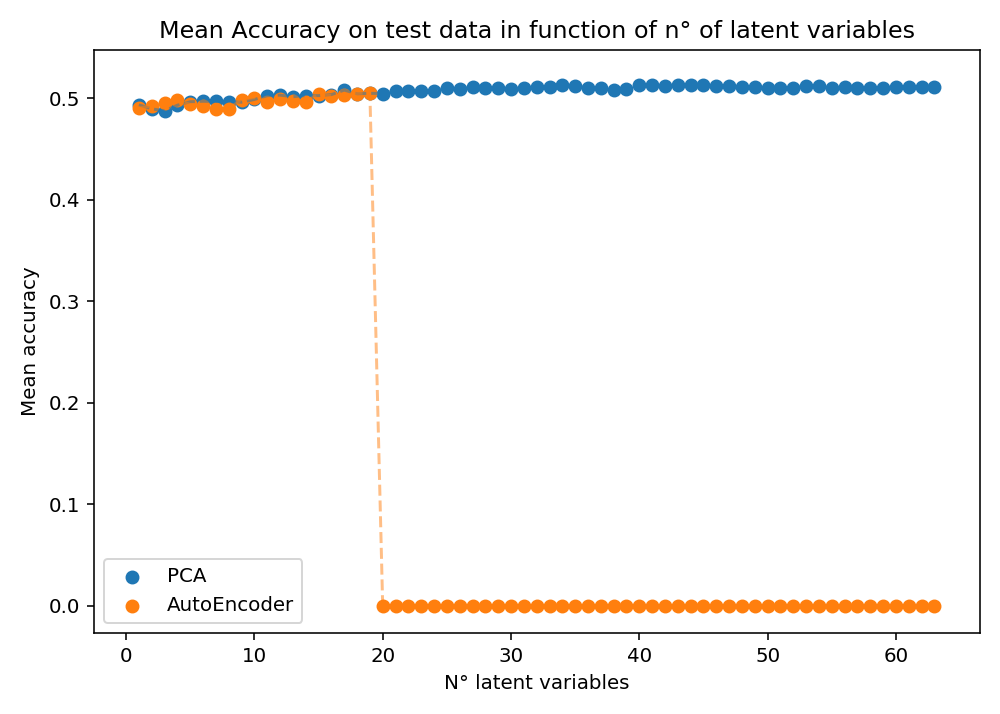

In [392]:
# scores_PCA.shape
# np.arange(1, n_latent_variables+1)
# plot scores
fig, ax = plt.subplots(figsize = (7, 5), tight_layout = True)

# PCA
ax.scatter(np.arange(1, n_latent_variables+1), scores_PCA, label = "PCA")
ax.plot(np.arange(1, n_latent_variables+1), scores_PCA, linestyle = "--", alpha = 0.5)

# AE
ax.scatter(np.arange(1, latent_dim_ae+1), scores_AE, label = "AutoEncoder")
ax.plot(np.arange(1, latent_dim_ae+1), scores_AE, linestyle = "--", alpha = 0.5)

ax.set_xlabel("N° latent variables")
ax.set_ylabel("Mean accuracy")
ax.set_title("Mean Accuracy on test data in function of n° of latent variables")
plt.legend()